In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import skew
from statsmodels.graphics.gofplots import qqplot
import numpy as np
from datatransform import df
from datatransform import DataTransform


transformer = DataTransform()    
transformer.to_categorical(df, col="Type") 



class Plotter:
    '''
    This class has methods that visualizes insights from the dataframe or dataframe columns
    
    methods:
    -------
    visual_null()
    
    visual_skew()
    
    co_ma()
    
    d_liers()
    
    vis_t_w()
    
    fal_rt()
    
    co_fal_rt()
    
    
    
    
    '''
    
    @staticmethod
    def load_df2(df):
        '''
        This method load the dataframe new_df.csv
        
        parameters:
        ----------
        df: dataframe to be loaded
        '''
        df2 = pd.read_csv(df)
        return df2
    
    @staticmethod
    def visual_null(df):
        '''
        this method visualizes dataframe columns that has null values
        
        parameters:
        ---------
        df:dataframe
        '''
        plt.figure(figsize= (8, 4))
        return msno.matrix(df)
    
    @staticmethod
    def visual_skew(df, col):
        '''
        this method visualizes the skewness of a dataframe column
        
        parameters:
        ----------
        df:dataframe
        col:dataframe column to be visualise for skewness
        '''
        plt.figure(figsize= (8, 4))
        sns.histplot(df, x= df[col], kde=True)
        return sns.despine()
    
    
    @staticmethod        
    def co_ma(df):
        '''
        this method visualize the correlation matrix of the dataframe columns
        (task 6)
        parameters:
        ---------
        df:dataframe
        '''
        plt.subplots(figsize=(15, 8))
        sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths= .5, fmt= ".2%")
        plt.tight_layout()
        return   plt.show()
    
    @staticmethod
    def d_liers(df, col):
        '''
        this method of visualization helps in detecting if a dataframe column has an 
        outlier
        (task 5 step 1 and 3)
        
        parameters:
        ---------
        df:dataframe
        col:dataframe column to visualized for the presence of outliers
        '''
        df.boxplot(column = col,grid=False,  fontsize=15,  figsize=(15, 8)) 
        return plt.show()
    
    @staticmethod
    def q_plot(df, col):
        '''
        this method also helps in detecting outliers in dataframe columns
        
        parameters:
        ---------
        df:dataframe
        col:dataframe column to be visualized for outliers
        '''
        qqplot(df['Rotational speed [rpm]'] , scale=1 ,line='q', fit=True)
        return plt.show()
    
    
    @staticmethod
    def vis_t_w(df):
        '''
        this method of visualization helps in  displaying the number of tools operating at different tool wear values. 
        
        (milstone 4 task 1)
        
        parameters:
        ---------
        df:dataframe
        
        '''
        df.groupby('Type').boxplot(column= 'Tool wear [min]', grid=False,  fontsize=15,  figsize=(15, 8))
        return plt.show()
    
    
    @staticmethod
    def fal_rt(df):
        df[['Machine failure','TWF','HDF','PWF','OSF','RNF']].agg('sum').plot(kind='bar',
        figsize=(15, 8), ylabel= 'NUMBERS OF FAILURES', fontsize= 15)
        return plt.show()
    
    @staticmethod
    def fal_grt(df):
        df[['Machine failure','TWF','HDF','PWF','OSF','RNF','Type']].groupby(by='Type').agg('sum').plot(kind='bar',
        figsize=(15, 8), ylabel= 'NUMBERS OF FAILURES', fontsize= 15)
        return plt.show()
     
    @staticmethod        
    def co_fal_rt(df):
        '''
        this method visualize the correlation matrix of the selected dataframe columns
        (milestone4, Task 3)
        parameters:
        ---------
        df:dataframe
        '''
        plt.subplots(figsize=(10, 5))
        sns.heatmap(df[['Air temperature [K]','Torque [Nm]','Tool wear [min]',
                  'Machine failure','TWF','HDF','PWF','OSF','RNF']].corr(numeric_only=True), 
                  annot=True, cmap='coolwarm', linewidths= .5, fmt= ".2%")
        plt.tight_layout()
        return   plt.show()

if __name__ == "__main__":
    plota = Plotter() 
       

In [13]:
plota.load_df2(df='new_df.csv')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,3416,M50595,M,301.4,310.4,1579,36.9,2.216667,0,0,0,0,0,0
1,7130,L54309,L,300.6,310.0,1635,31.0,1.783333,0,0,0,0,0,0
2,2320,H17179,H,299.2,308.8,1700,33.5,3.083333,0,0,0,0,0,0
3,9601,L24460,L,298.9,310.0,1561,45.3,0.966667,0,0,0,0,0,0
4,614,L47793,L,298.1,309.9,1634,30.0,0.883333,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9018,H23877,H,297.3,308.1,1369,52.0,3.566667,0,0,0,0,0,0
9996,3339,M18198,M,301.6,310.9,1510,40.9,2.533333,0,0,0,0,0,0
9997,5771,L52950,L,301.6,311.2,1408,42.9,1.483333,0,0,0,0,0,0
9998,3056,L50235,L,300.1,309.2,1427,37.6,1.216667,0,0,0,0,0,0


<Axes: >

<Figure size 800x400 with 0 Axes>

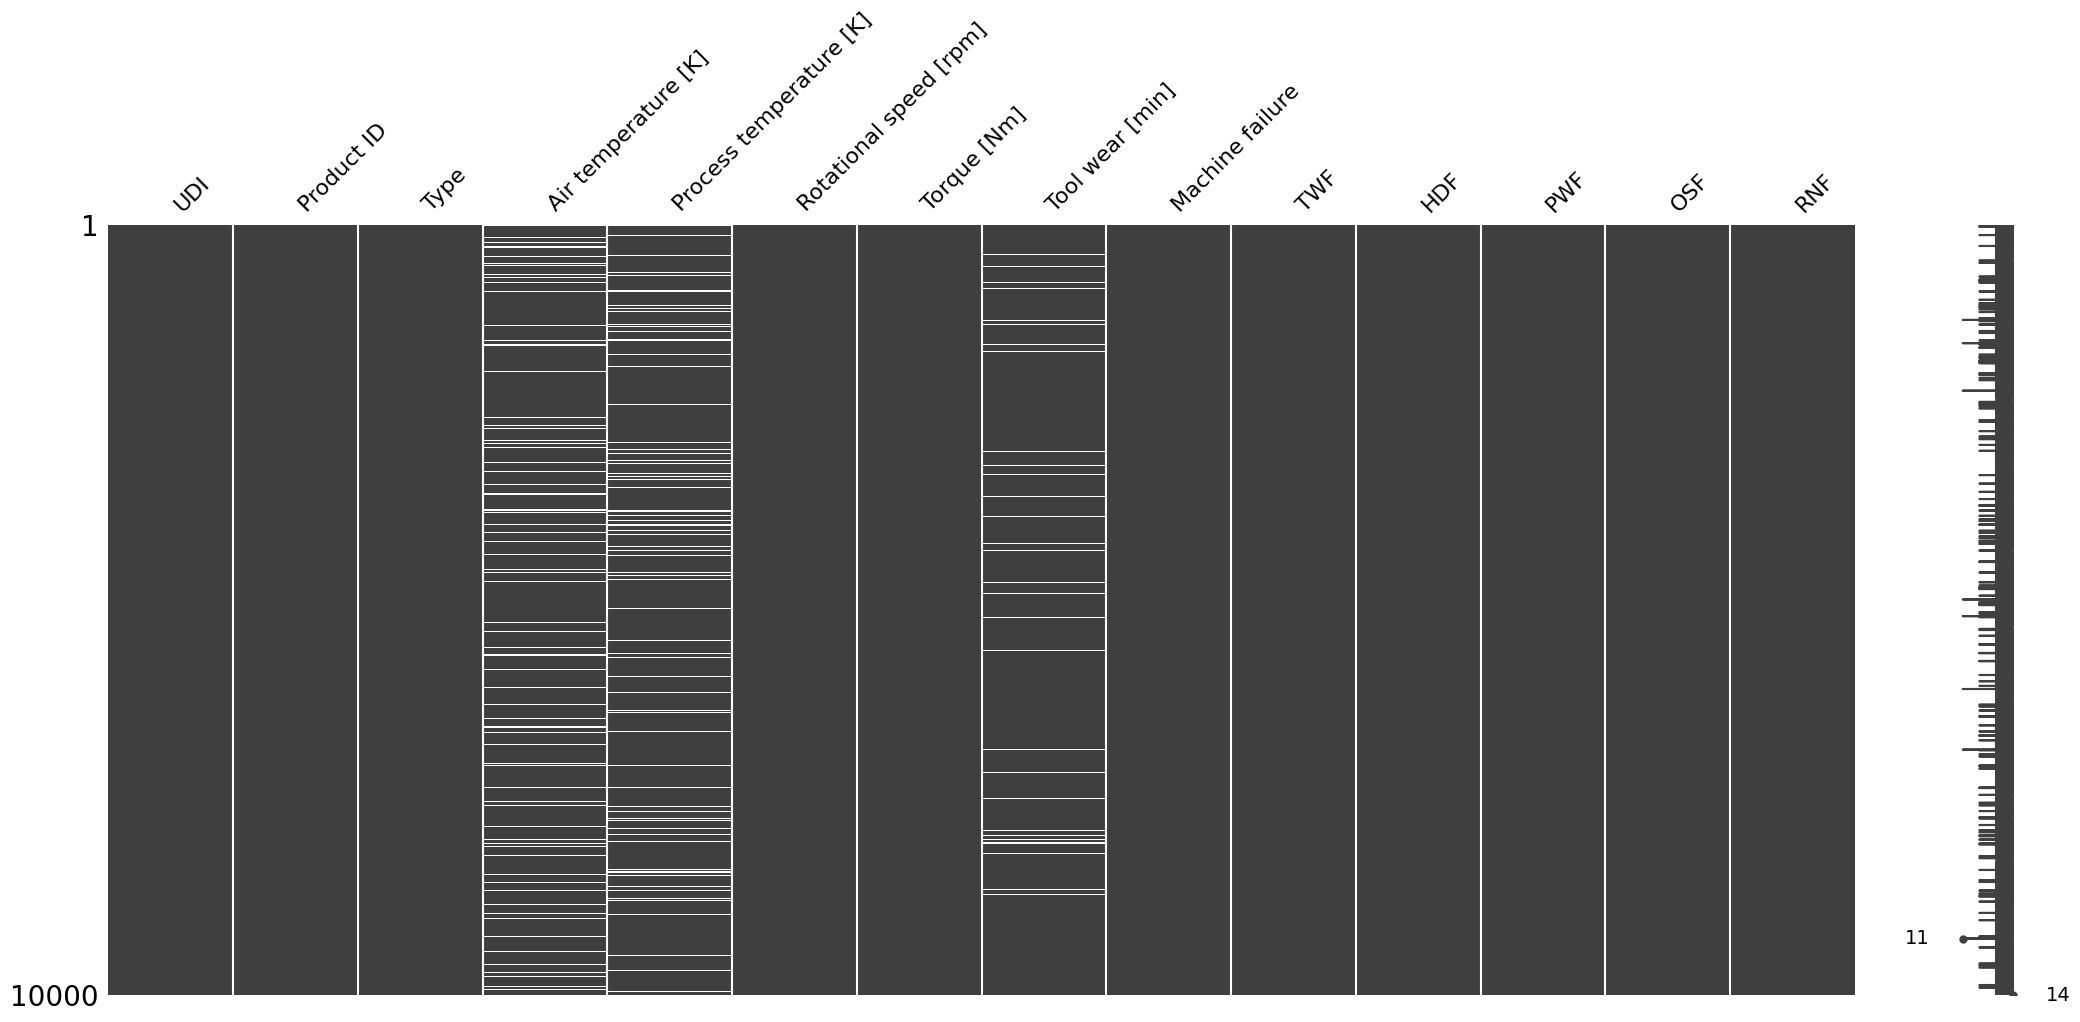

In [14]:
plota.visual_null(df)

<Axes: >

<Figure size 800x400 with 0 Axes>

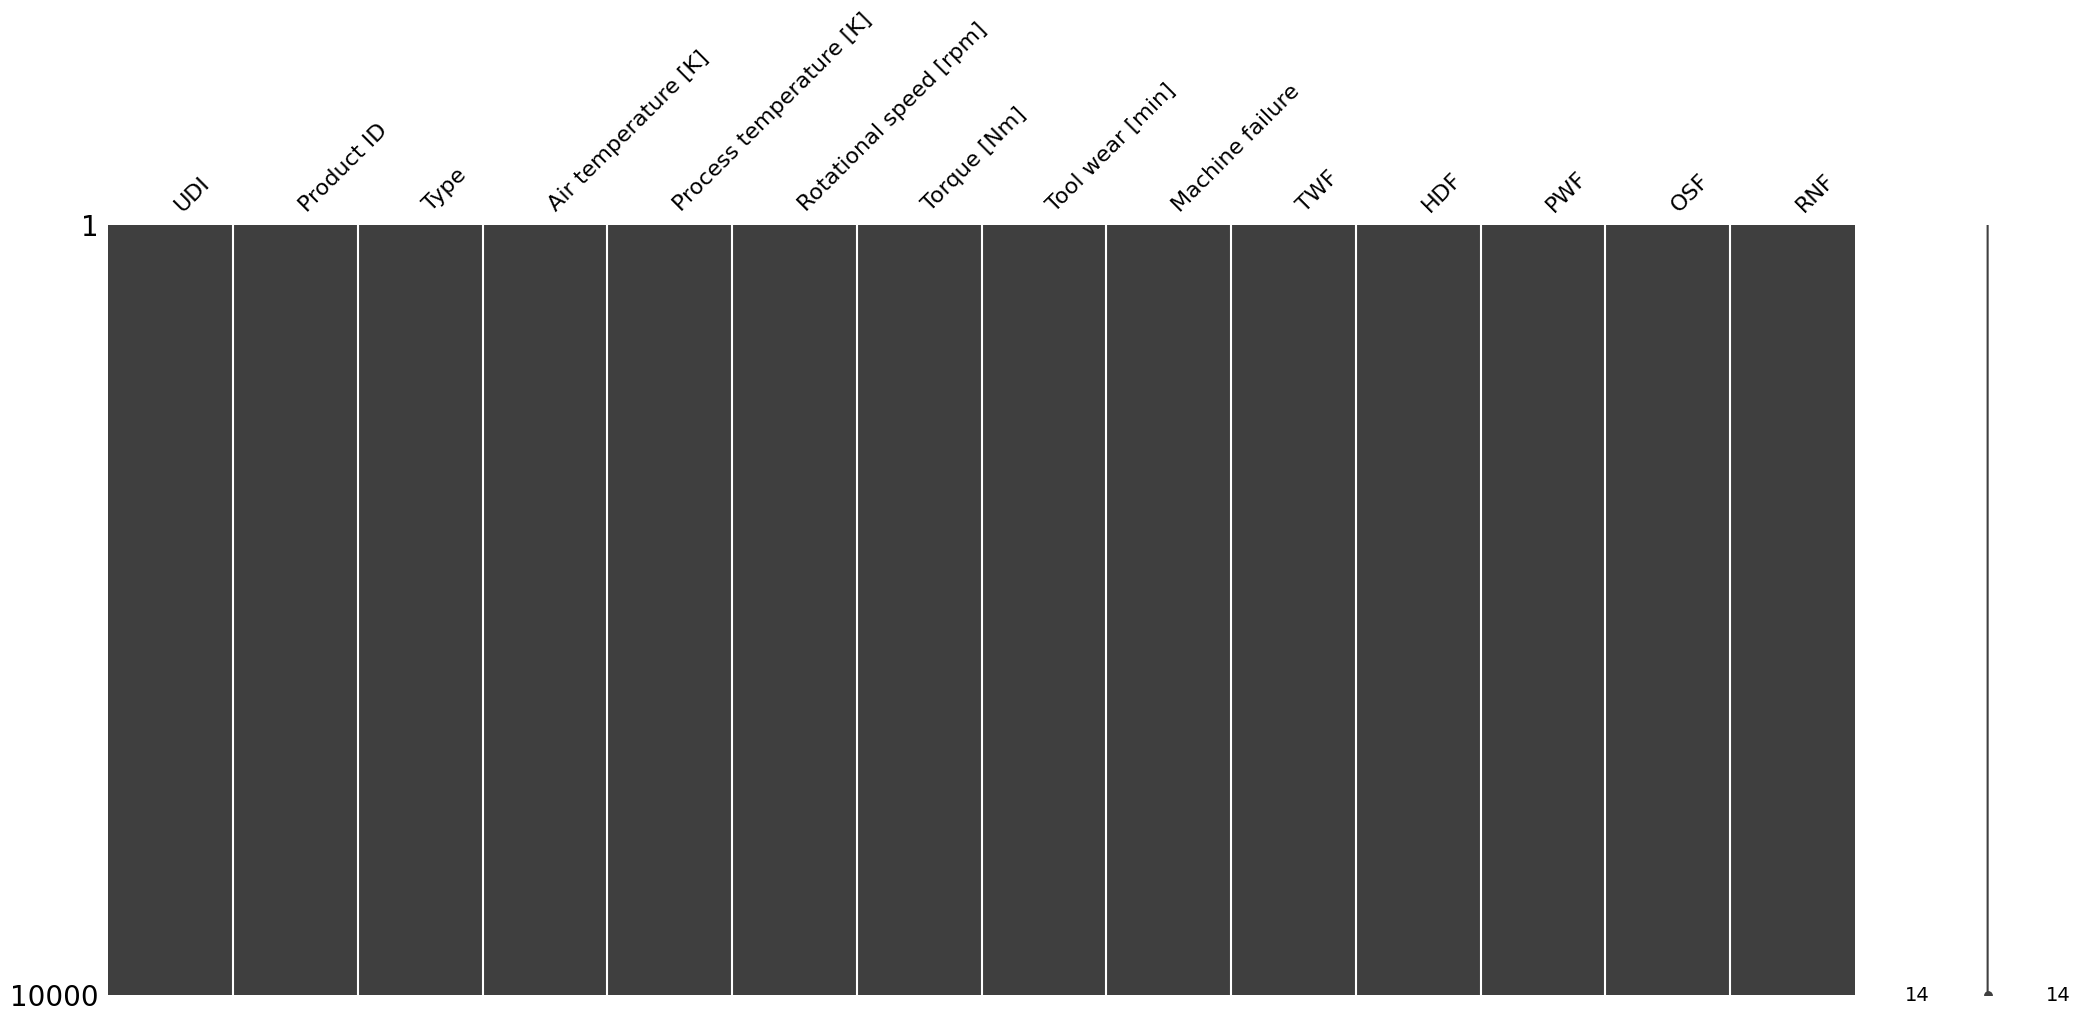

In [15]:
df = plota.load_df2(df='new_df.csv') 
plota.visual_null(df)
#milestone3, task3, step4

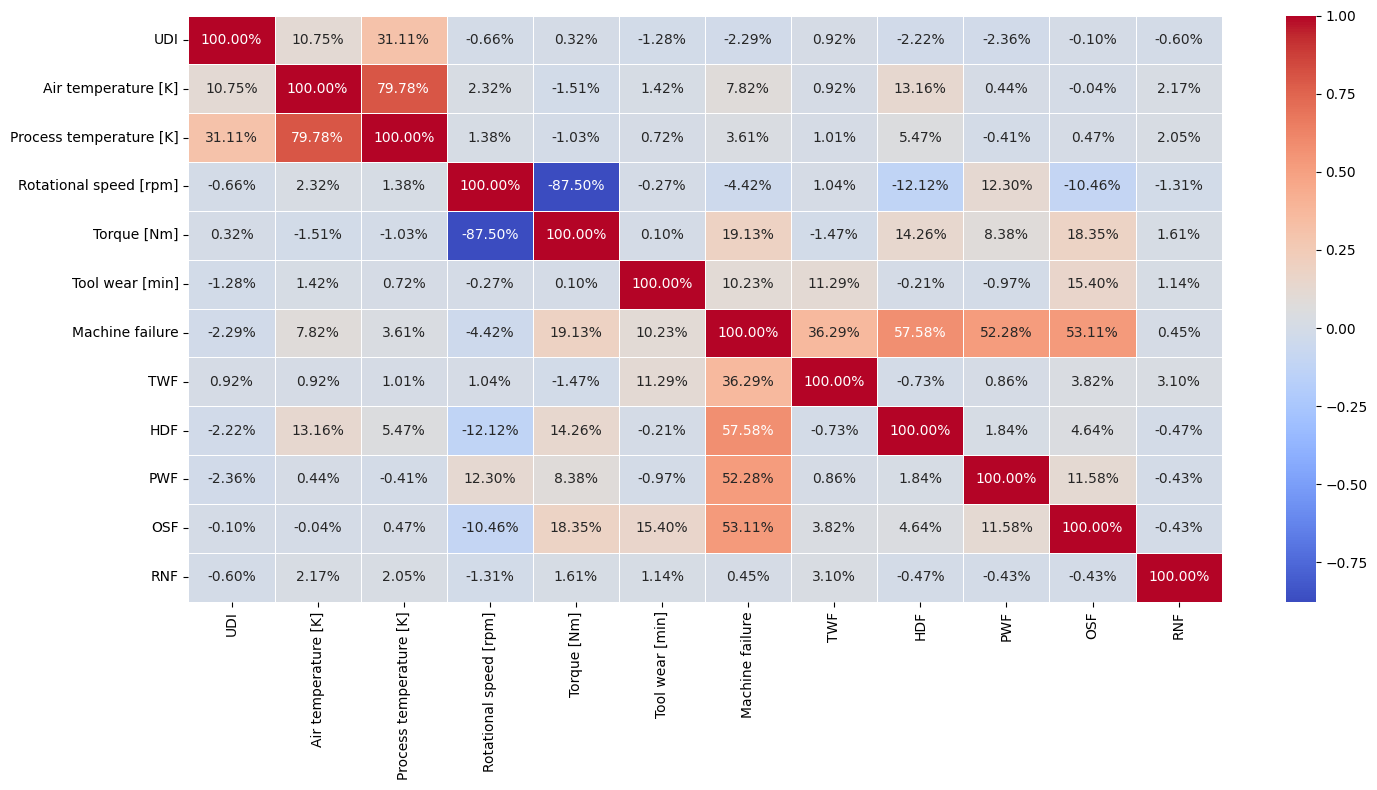

In [16]:
plota.co_ma(df)
#milestone3 task6, step1
# milestone3, task6,step 2, as seen below process temperature and air temperature are highly co-rellated
#milestone3, task6,step3, i won't remove the co-rrellated columns because i need the columns in milestone 4 analysis

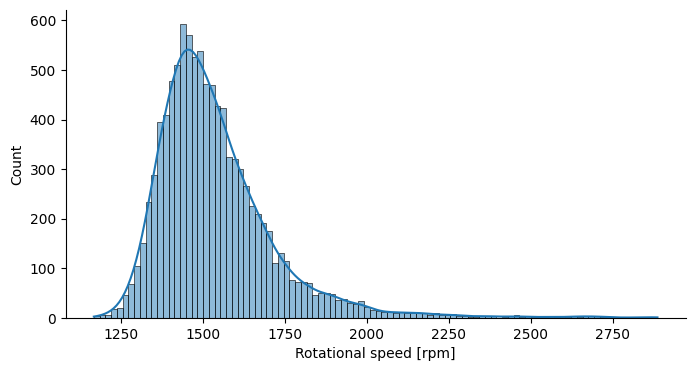

In [17]:
plota.visual_skew(df, col= 'Rotational speed [rpm]')

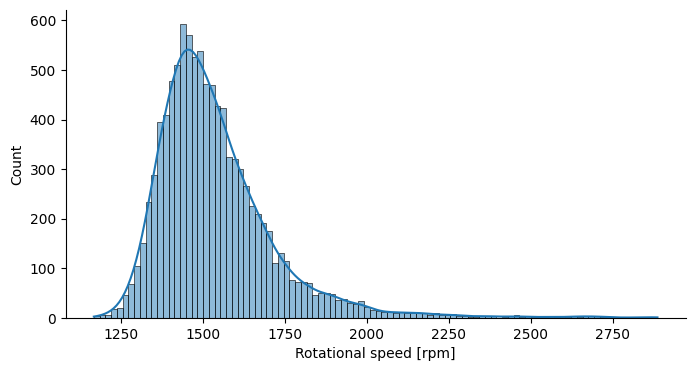

In [18]:
df = plota.load_df2(df='new_df.csv')
plota.visual_skew(df, col= 'Rotational speed [rpm]')

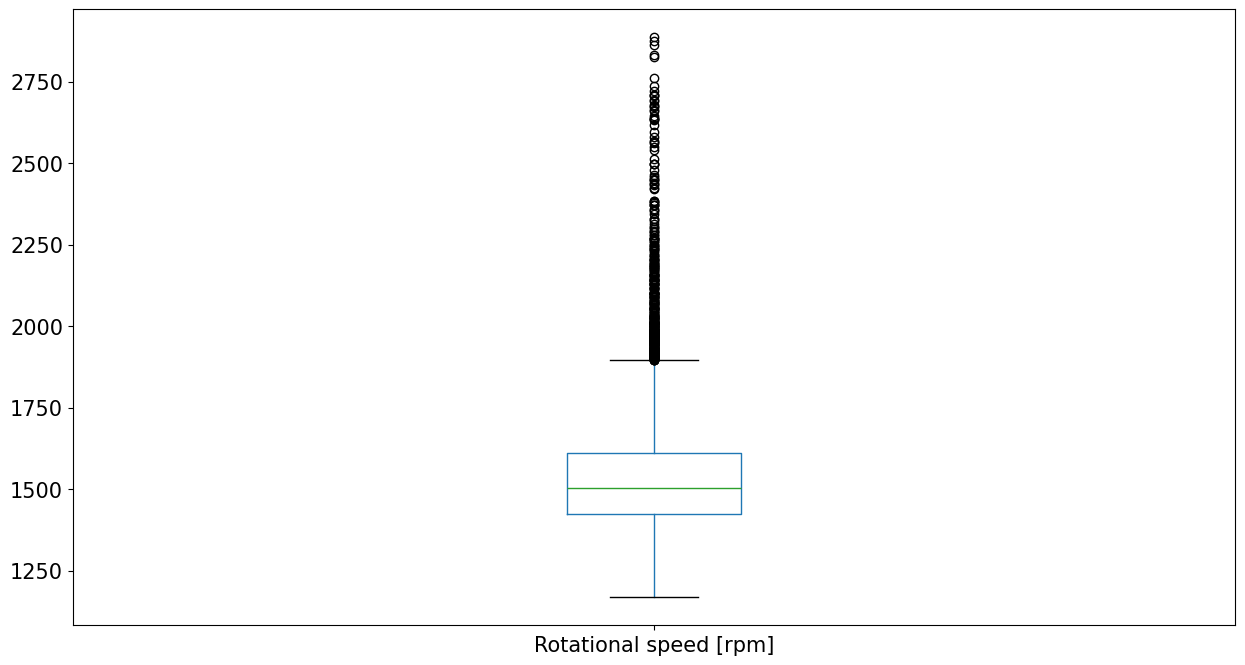

In [19]:
plota.d_liers(df, col= 'Rotational speed [rpm]')

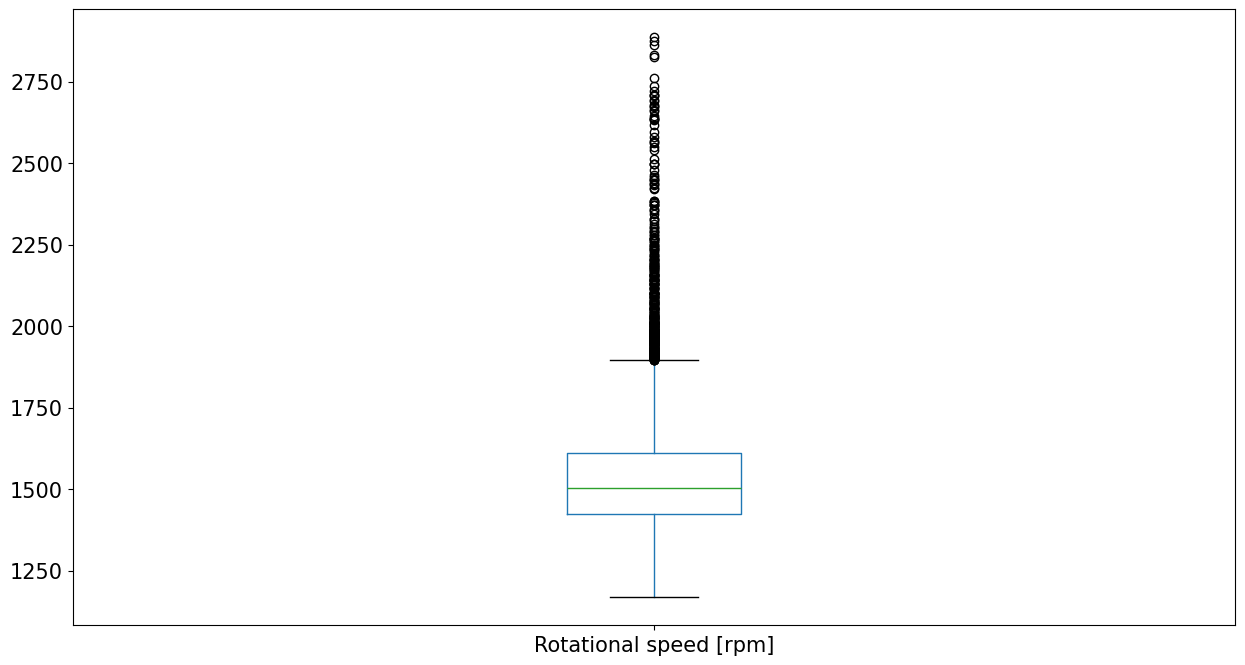

In [20]:
df = plota.load_df2(df='new_df.csv')
plota.d_liers(df, col= 'Rotational speed [rpm]')

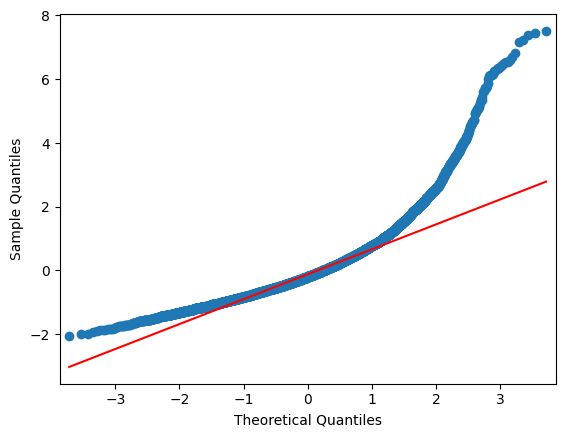

In [21]:
plota.q_plot(df, col='Rotational speed [rpm]')

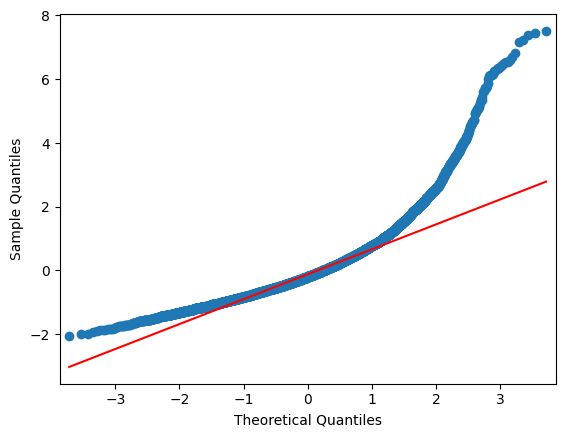

In [22]:
df = plota.load_df2(df='new_df.csv')
plota.q_plot(df, col='Rotational speed [rpm]')

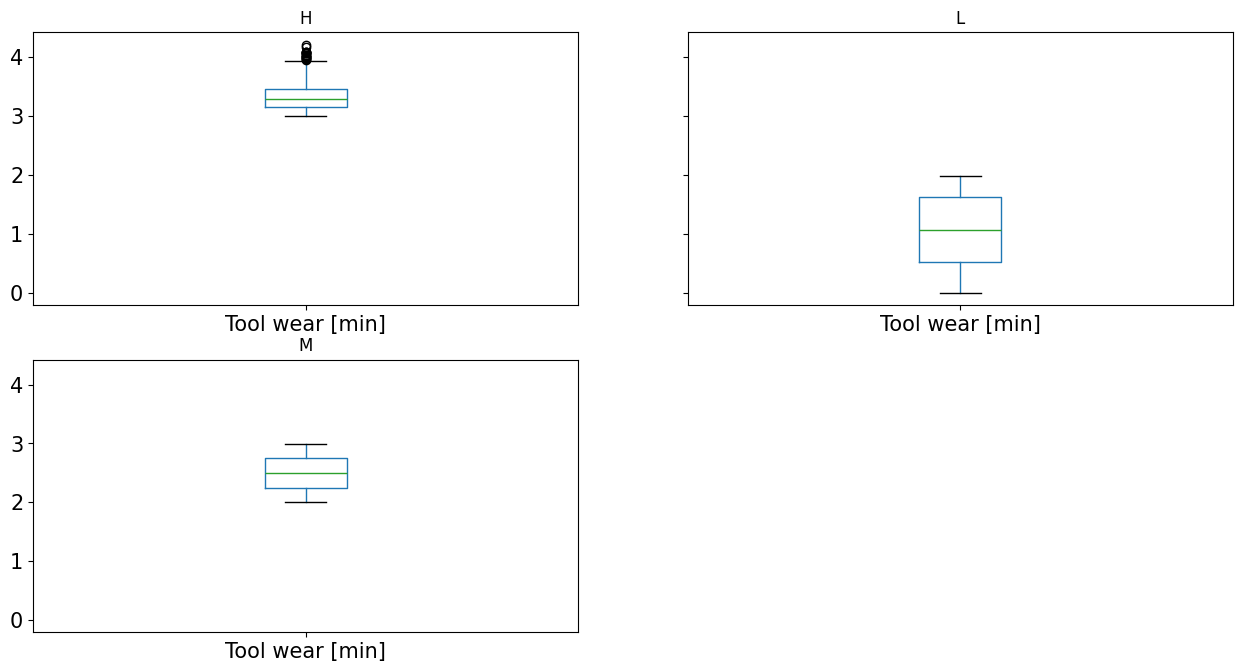

In [23]:
df = plota.load_df2(df='new_df.csv') 
plota.vis_t_w(df)
#milestone4, task1
#The management would also like to know the upper limits of tool wear the machine tools have been operating at. 
# Create a visualisation displaying the number of tools operating at different tool wear values.

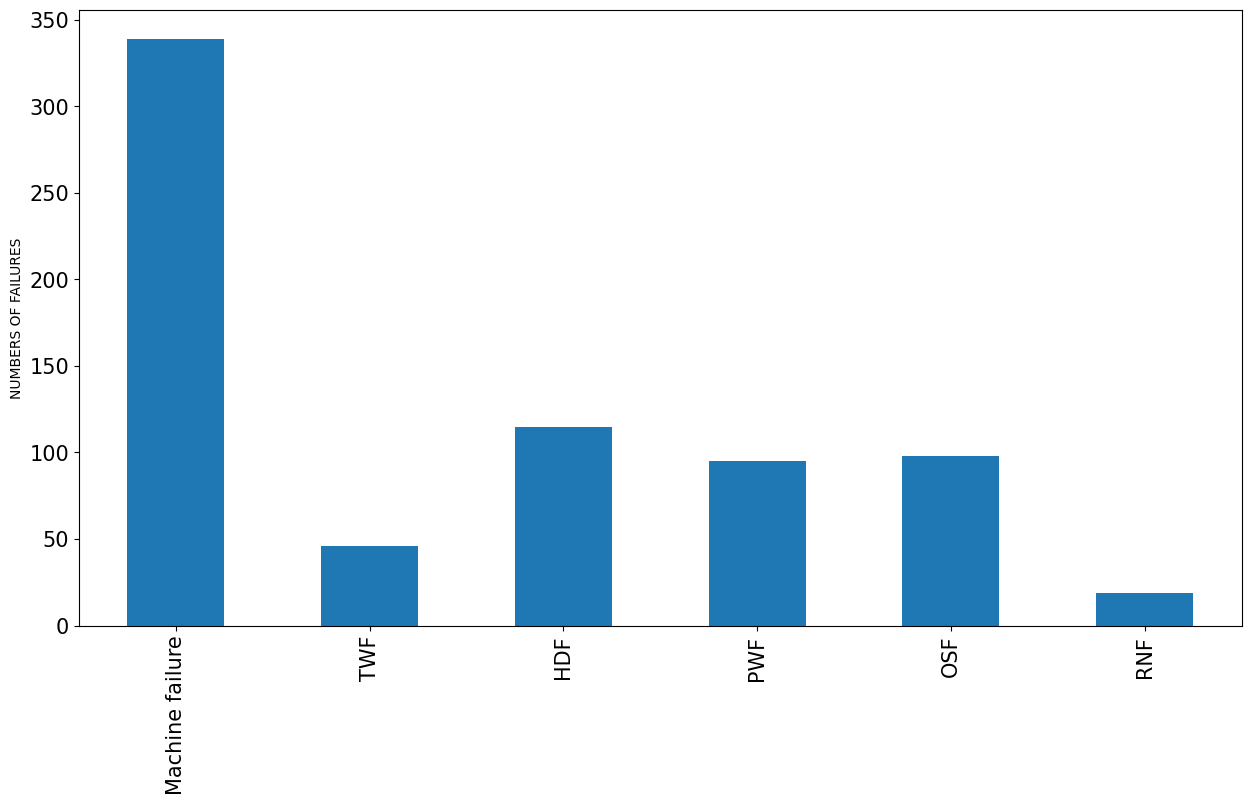

In [24]:
df = plota.load_df2(df='new_df.csv') 
plota.fal_rt(df)
#milestone4, task2
#Determine and visualise how many failures have happened in the process,.
#What seems to be the leading causes of failure in the process?
# Create a visualisation of the number of failures due to each possible cause during the manufacturing process

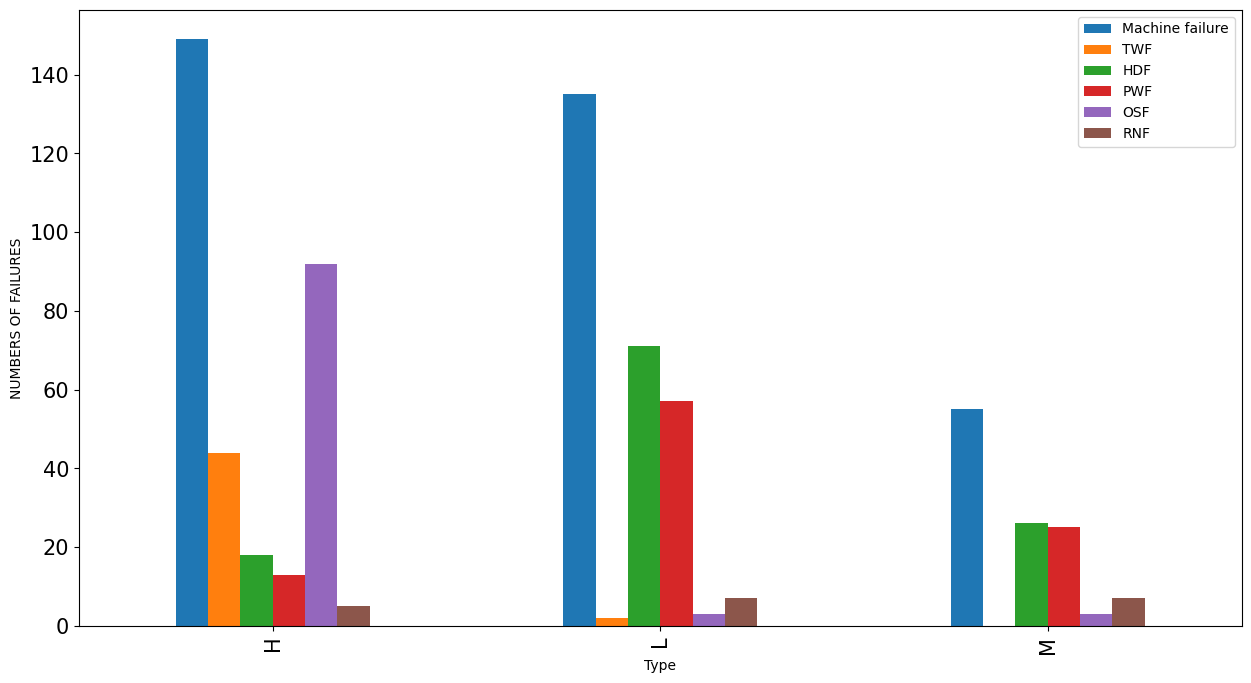

In [32]:
df = plota.load_df2(df='new_df.csv')
plota.fal_grt(df)
##milestone4, task2
# what percentage is this of the total? 
# Check if the failures are being caused based on the quality of the product

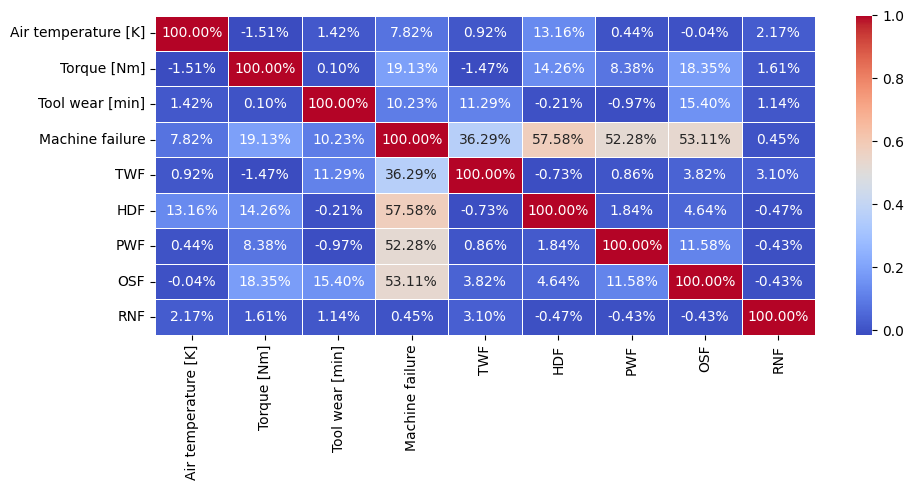

In [25]:
df = plota.load_df2(df='new_df.csv') 
plota.co_fal_rt(df)
#For each different possible type of failure try to investigate if 
# there is any correlation between any of the settings the machine was running at. 
# Do the failures happen at certain torque ranges, processing temperatures or rpm?


In [ ]:
#As seen above the failure rate is been influenced by Torque the most,
# followed by Tool wear duration and Air temperature respectively
